In [23]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Carregar os dados
data = pd.read_csv('train.csv')

In [25]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,66728,21770,1,156,64.0,140,80,2,1,0,0,1,1
1,69098,21876,1,170,85.0,160,90,1,1,0,0,1,1
2,59185,23270,1,151,90.0,130,80,1,1,0,0,1,1
3,49288,19741,1,159,97.0,120,80,1,1,0,0,1,1
4,62481,18395,1,164,68.0,120,80,1,1,0,0,1,0


In [26]:
# Calculate Pearson's r
correlation = data["ap_hi"].corr(data["ap_lo"])
print("Correlation between systolic and diastolic pressure: {:.2f}".format(correlation))

Correlation between systolic and diastolic pressure: 0.02


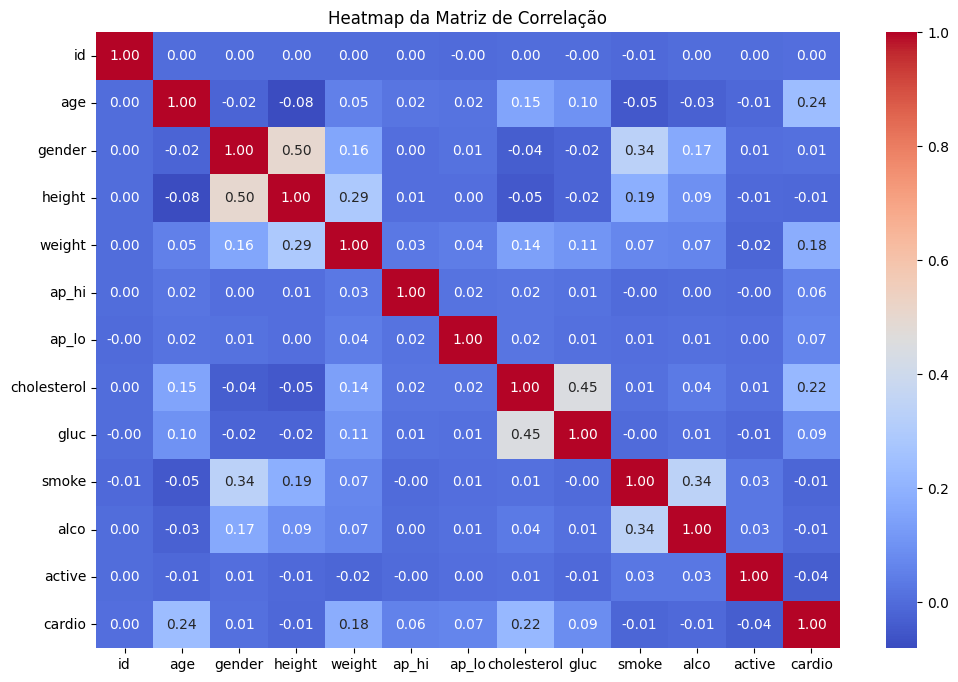

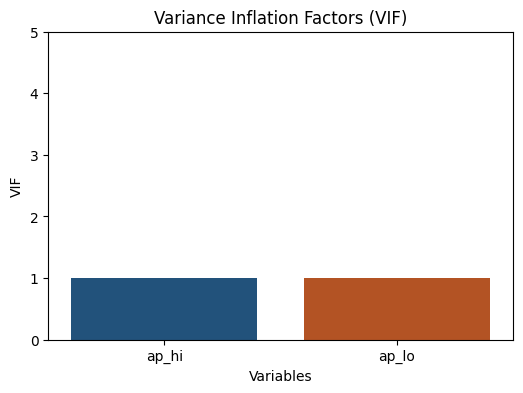

In [27]:
# Calcular a matriz de correlação para todas as variáveis numéricas
corr_matrix = data.corr()

# Criar um heatmap da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap da Matriz de Correlação")
plt.show()


# Selecionar as variáveis numéricas independentes
X = data[["ap_hi", "ap_lo"]]

# Adicionar uma constante para o cálculo do VIF (necessário para a função variance_inflation_factor)
X = np.column_stack((np.ones(len(X)), X))

# Calcular o VIF para cada variável
vif = pd.DataFrame()
vif["Variable"] = ["Intercept"] + ["ap_hi", "ap_lo"]
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Definir manualmente as cores das colunas em formato hexadecimal
colors = ['#13538A', '#CB4B0C']

plt.figure(figsize=(6, 4))
sns.barplot(x=vif["Variable"][1:], y=vif["VIF"][1:], palette=colors)  # Ignorar o intercept
plt.title("Variance Inflation Factors (VIF)")
plt.xlabel("Variables")
plt.ylabel("VIF")
plt.ylim(0, 5)  # Definir a escala do eixo y de 0 a 5
plt.show()

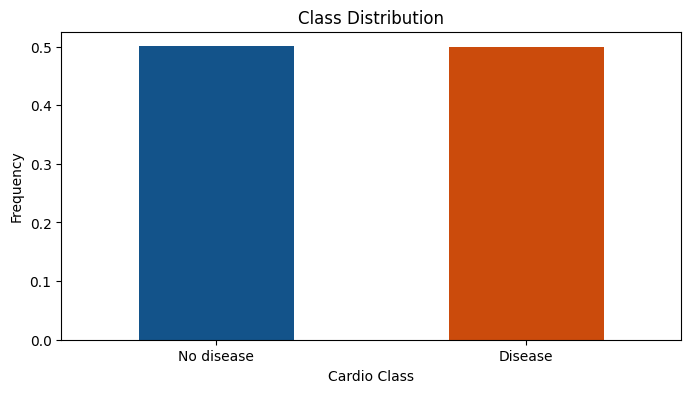

In [28]:
class_counts = data['cardio'].value_counts(normalize=True)

# Define the bar colors
colors = ['#13538A', '#CB4B0C']

# Set the figure size
plt.figure(figsize=(8, 4))

class_counts.plot(kind='bar', color=colors)
plt.title('Class Distribution')
plt.xlabel('Cardio Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No disease', 'Disease'], rotation=0)
plt.show()

In [29]:
# Contar o número de valores nulos em cada coluna
null_values = data.isnull().sum()

# Criar uma tabela com os resultados
table = pd.DataFrame({'Column': null_values.index,
                      'Null-Count': null_values.values})

# Mostrar a tabela
print(table)

         Column  Null-Count
0            id           0
1           age           0
2        gender           0
3        height           0
4        weight           0
5         ap_hi           0
6         ap_lo           0
7   cholesterol           0
8          gluc           0
9         smoke           0
10         alco           0
11       active           0
12       cardio           0
